# Model Selection

This notebook shows how one can use the `comparison` submodule of `kosmatau3d` to compare the models with observations.

***Note:*** *For now the observations must have the same gridding in longitude.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from kosmatau3d import comparison as comp

In [11]:
# Path to observational data survey folders
path = '/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/'

# target header and kernel for regridding
target_header = {
    'NAXIS': 3,
    'NAXIS1': 361,
    'NAXIS2': 181,
    'NAXIS3': 701,
    'CTYPE1': 'GLON-CAR',
    'CRVAL1': 0,
    'CDELT1': 1,
    'CRPIX1': 181,
    'CTYPE2': 'GLAT-CAR',
    'CRVAL2': 0,
    'CDELT2': 1,
    'CRPIX2': 91,
    'CTYPE3': 'VELO',
    'CRVAL3': 0,
    'CDELT3': 1,
    'CRPIX3': 351,
}
kernel_sigma = 1
target_kernel = (
    'gauss1d',
    (kernel_sigma,),
    kernel_sigma*3,
    kernel_sigma/2,
)

# List of survey missions to work on
mission = ['COBE-FIRAS']#['COGAL', 'SEDIGISM', 'Mopra', 'ThrUMMS']

### regrid surveys

In [12]:
comp.regrid_observations(
    path='/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/',
    mission='COBE-FIRAS',
    target_header=target_header,
    target_kernel=target_kernel,
)

Regridding COBE-FIRAS survey
COBE-FIRAS
FIRAS_LINE_EMISSION_MAP_HIGH.FITS
FIRAS_LINE_EMISSION_MAP_HRES.FITS
FIRAS_LINE_EMISSION_MAP_LOWF.FITS
Regrid successfully completed.


0

### view survey

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  361                                                  
NAXIS2  =                  181                                                  
CTYPE1  = 'GLON-CAR'                                                            
CRVAL1  =                    0                                                  
CDELT1  =                    1                                                  
CRPIX1  =                  181                                                  
CTYPE2  = 'GLAT-CAR'                                                            
CRVAL2  =                    0                                                  
CDELT2  =                    1                                                  
CRPIX2  =                   

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

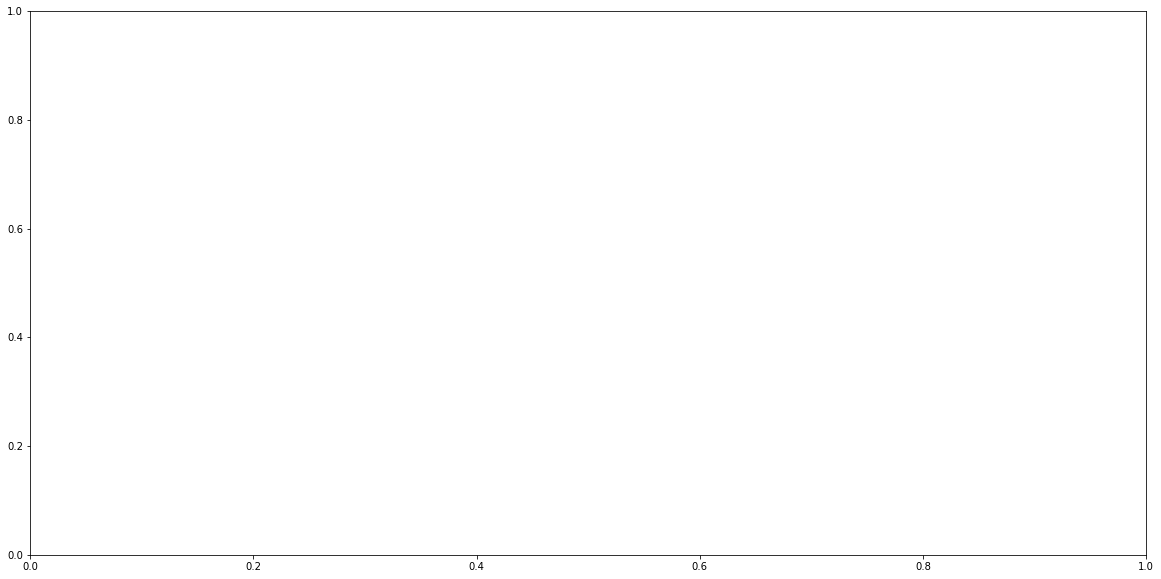

In [8]:
%matplotlib inline
comp.view_observation(
    path='/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/',
    mission='Planck',
    regridded_path='/regridded/temp/',
    # regridded_path='/regridded/',
    list_observations=False,
    # regridded_path='',
    # filename='G300.5-12CO_Vfull_regridded.fits',
    #FIRAS HIGH: CO 6, C 2, C+ 1, O 1
    #FIRAS HRES:
    # filename='FIRAS_LINE_EMISSION_MAP_HIGH_regridded.fits',
    # filename='dust_COM_CompMap_dust-commander_0256_R2.00.fits',
    # filename='co1_test_regridded_error.fits',
#     filename='co1_test_regridded.fits',
    filename='planck_dust_regridded.fits',
    # filename='13co2_test_regridded_error.fits',
    # filename='13co2_test_regridded.fits',

    # filename='G001_13CO21_Tmb_DR1.fits',
    transition='Dust',
    plot='pv',
    integrate_b=[89, 93],
    # i_lat=91,
    # ylabel=r'$I_{CII}$ $(nW \ m^{-2} \ sr^{-1})$',
    clabel=r'$\int T_{B}db$ $(K^\circ)$',
    # title=r'COGAL CO $1 \rightarrow 0$',
    scale=0.5,
    logval=False,
    vmin=-2,
    vmax=2,
    # xlim=[60, 180],
    # ylim=[-200, 200],
    # cmap='gist_ncar',
    cmap='magma',
    save=False,
)

### compare to models

In [ ]:
# Available directories:
# - '/r400_cm{}-{}_d{}_uv{:.0f}/'
#   [[0.25, 0.5, 1.0, 2.0, 4.0], [1.0, 2.0], [0.25, 0.5, 1.0, 2.0, 4.0], [10, 100]]
# - '/r400_fcm{}_ficm{}/'
#   [[0.25, 0.5, 1.0, 2.0, 4.0], [0.25, 0.5, 1.0, 2.0, 4.0]]
# - '/r400_fcm{}_cm{}/'
#   [[0.25, 0.5, 1.0, 2.0, 4.0], ['0_2', '0_3', '-1_2', '-1_3']]
# - '/r400_ficm{}_icm{}/'
#   [[0.25, 0.5, 1.0, 2.0, 4.0], ['-2', '-2_-1', '-3_-1', '-3_-2']]
# - '/r400_rcmz{:.0f}_uv{}/'
#   [np.arange(0, 3001, 200), [10, 50, 100]]
comp.model_selection(
    mission=['COBE-FIRAS'],
    lat=None,
    PLOT=False,
    debug=False,
    cmap='viridis',
    model_dir='/r400_rcmz{:.0f}_uv{}/',
    model_param=[np.arange(0, 3001, 200), [10, 50, 100]],
    PRINT=True,
    )

### plot comparison results

In [37]:
%matplotlib inline
# This should be set to used to create plots of the model comparison for
#  various 2-dimensional grids. For grids with more parameters, the other
#  parameters will be identified via subplots.
comp.plot_comparison(
    missions=['COGAL'],
    file_format='r400_fcm{}_ficm{}',
    model_param=[[0.25, 0.5, 1.0, 2.0, 4.0], [0.25, 0.5, 1.0, 2.0, 4.0]],
    normalise=True,
    log=False,
    contour=True,
    levels=100,
    xlabel=r'$f_{clump}$',
    ylabel=r'$f_{interclump}$',
    clabel=r'$log_{10}(\mathcal{L})$',
#     supxlabel=r'$f_{FUV}$',
#     supylabel=r'$f_{\rho}$',
    fraction=0.045,
    clabel_xa=0.95,
    aspect=20,
    figsize=(10, 10),
    pad=1,
    pad_left=0.1,
    pad_right=0.1,
    pad_bottom=0.05,
    pad_top=0.05,
#     wspace=0.3,
    fontsize=24,
    save_plot=False,
    verbose=False,
    output_format='eps',
)

['COGAL']


['COBE-FIRAS', 'COGAL', 'Mopra', 'Planck', 'SEDIGISM', 'ThrUMMS']

COBE-FIRAS

FIRAS_LINE_EMISSION_MAP_HIGH2_regridded
  transitions CH 2, CO 6, H2O 2, H2O f1113, N+ 1, N+ 2, O 1, Si not available.
FIRAS_LINE_EMISSION_MAP_HIGH_regridded
  transitions CH 2, CO 6, H2O 2, H2O f1113, N+ 1, N+ 2, O 1, Si not available.
FIRAS_LINE_EMISSION_MAP_HRES_regridded
  transitions H2O f557, O2 13 not available.
FIRAS_LINE_EMISSION_MAP_LOWF_regridded


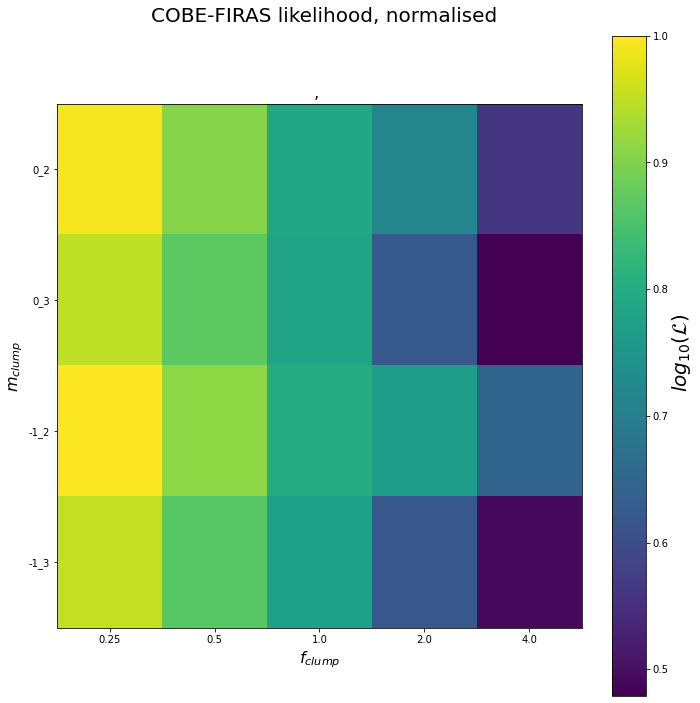


COGAL

co1_test_regridded


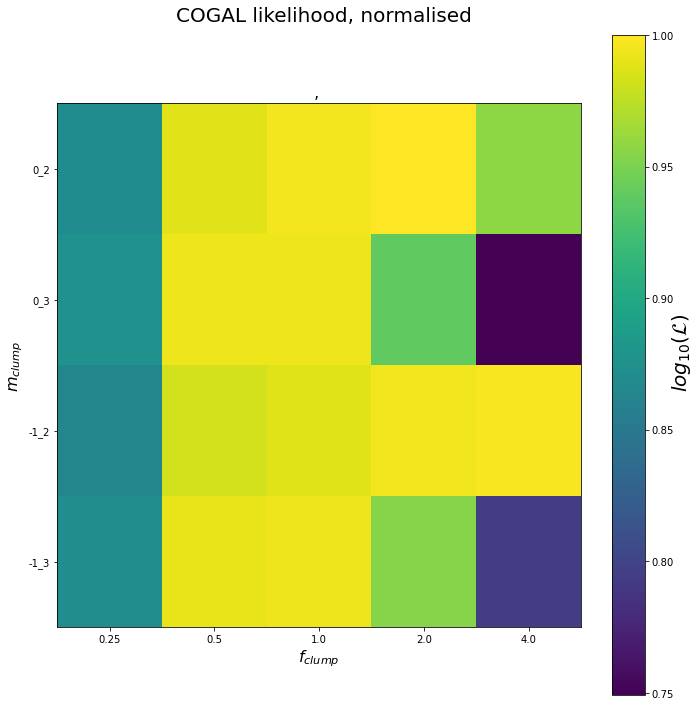


Mopra

13co1_test_regridded
co1_test_regridded


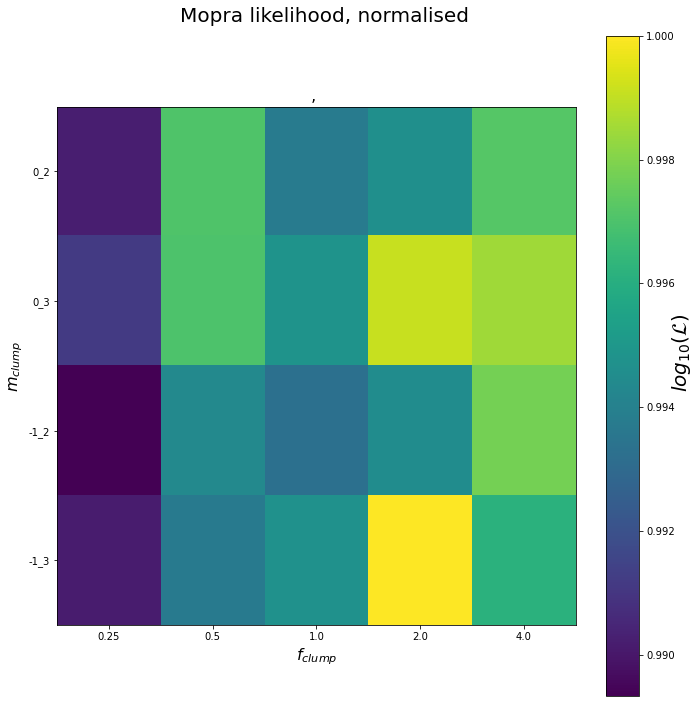


Planck

planck_dust_regridded


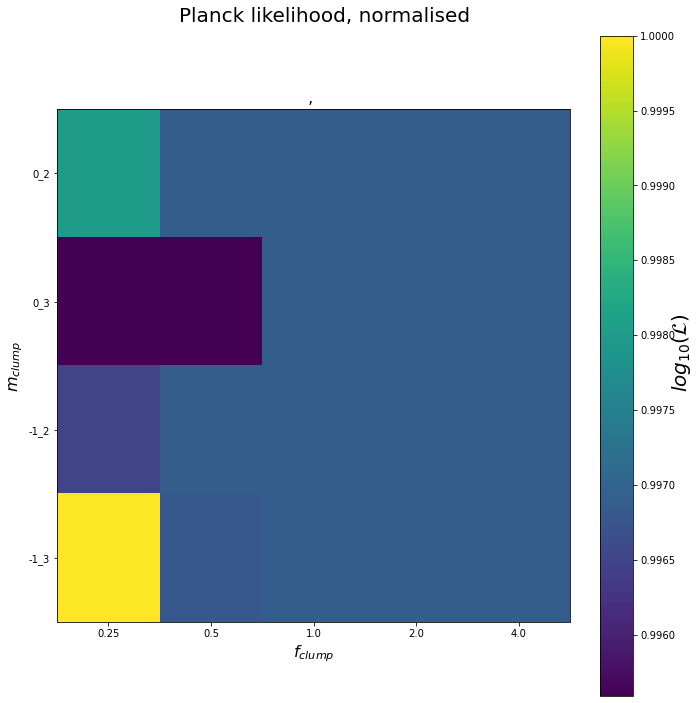


SEDIGISM

13co2_test_regridded


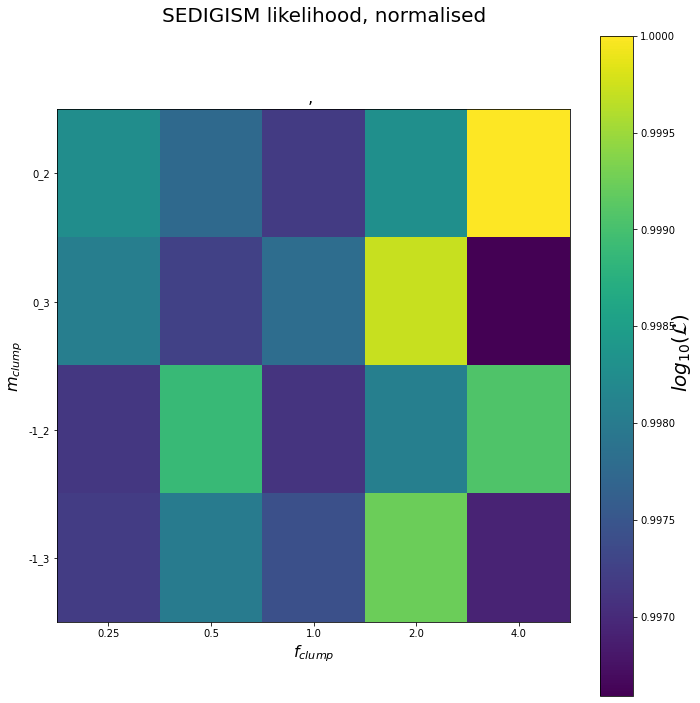


ThrUMMS

13co1_test_regridded
co1_test_regridded


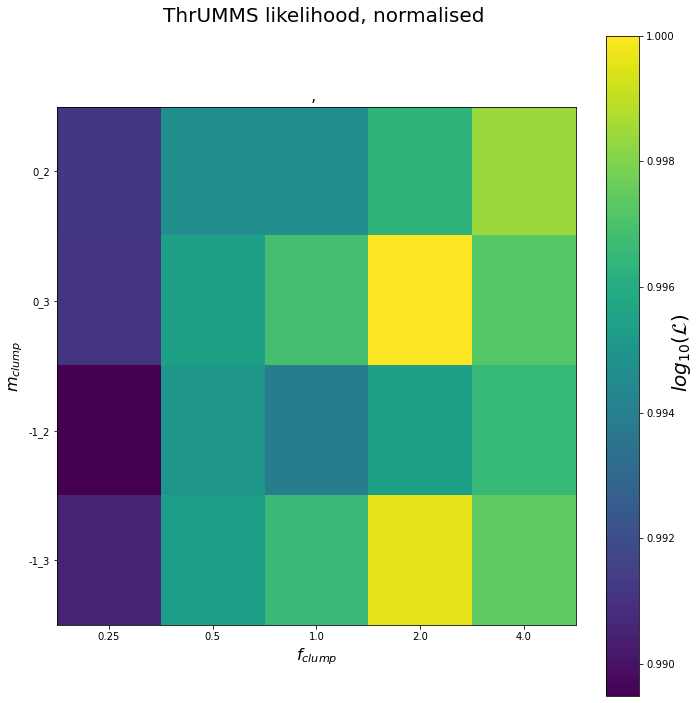

In [3]:
%matplotlib inline
# This should be set to used to create plots of the model comparison for
#  various 2-dimensional grids. For grids with more parameters, the other
#  parameters will be identified via subplots.
comp.plot_comparison(
    missions=None,
    file_format='r400_fcm{}_cm{}',
    model_param=[['0.25', '0.5', '1.0', '2.0', '4.0'], ['0_2', '0_3', '-1_2', '-1_3']],
    normalise=True,
    log=False,
    contour=False,
    levels=25,
    xlabel=r'$f_{clump}$',
    ylabel=r'$m_{clump}$',
    clabel=r'$log_{10}(\mathcal{L})$',
    verbose=True,
)